C:\Users\ibnuh\AppData\Local\Temp\ipykernel_31340\701745257.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_company.index, y=avg_price_by_company.values, palette="viridis")


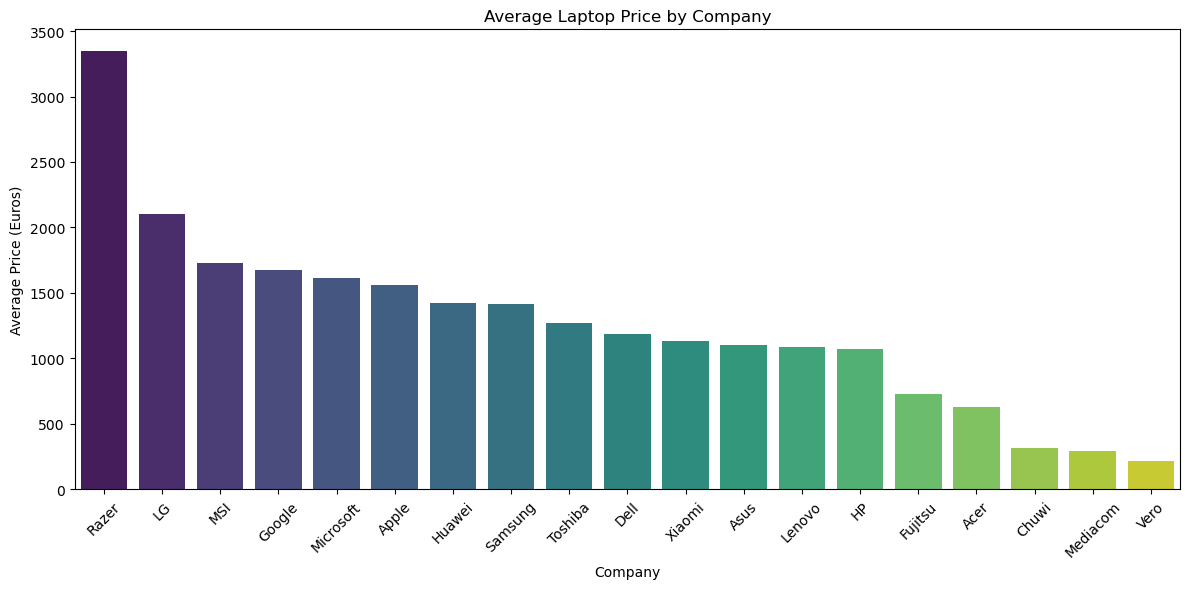

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("laptop_price.csv", encoding="latin1")

# Calculate average price by company
avg_price_by_company = df.groupby("Company")["Price_euros"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_company.index, y=avg_price_by_company.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Average Price (Euros)")
plt.title("Average Laptop Price by Company")
plt.tight_layout()
plt.show()


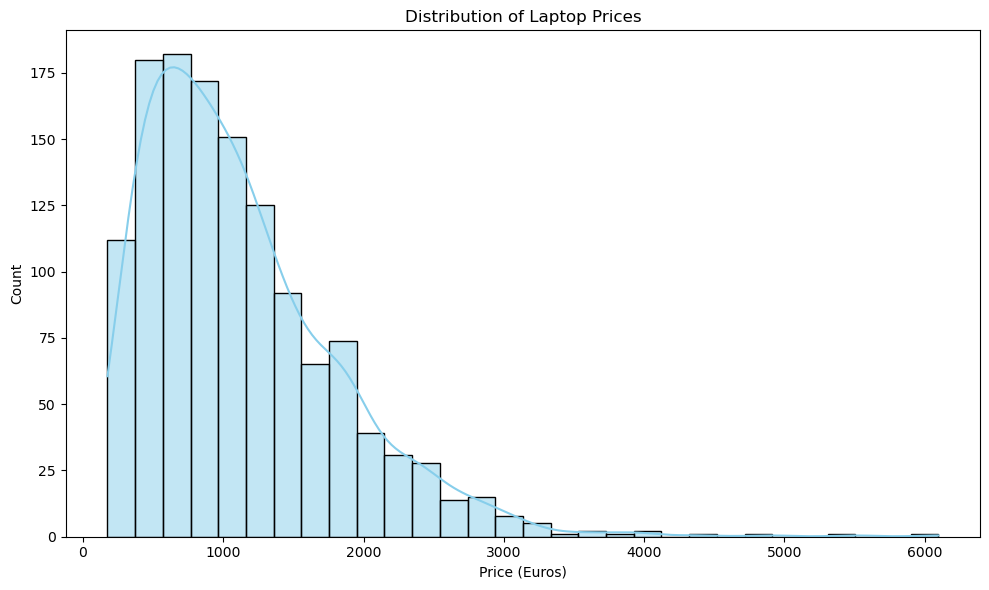

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("laptop_price.csv", encoding="latin1")

# Plot histogram of laptop prices
plt.figure(figsize=(10, 6))
sns.histplot(df["Price_euros"], bins=30, kde=True, color="skyblue")
plt.xlabel("Price (Euros)")
plt.ylabel("Count")
plt.title("Distribution of Laptop Prices")
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv("laptop_price.csv", encoding="latin1")

# Calculate statistics
mean_price = df["Price_euros"].mean()
median_price = df["Price_euros"].median()
mode_price = df["Price_euros"].mode()[0]  # mode() returns a Series

# Print results
print(f"Mean Price: €{mean_price:.2f}")
print(f"Median Price: €{median_price:.2f}")
print(f"Mode Price: €{mode_price:.2f}")


Mean Price: €1123.69
Median Price: €977.00
Mode Price: €1099.00


Mean Squared Error: 223514.52923301992
R² Score: 0.5599471216128358


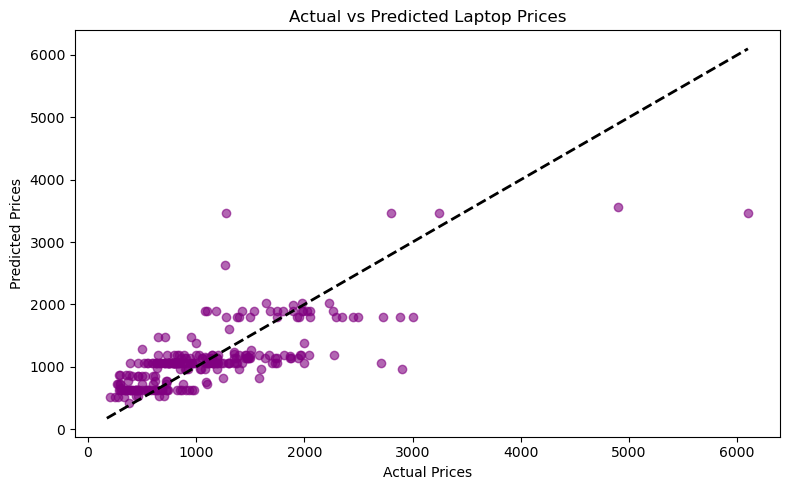

In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("laptop_price.csv", encoding="latin1")

# Preprocess: clean and convert 'Ram' and 'Inches'
df["Ram"] = df["Ram"].str.replace("GB", "").astype(int)
df["Inches"] = df["Inches"].astype(float)

# Select features and target
X = df[["Ram", "Inches"]]
y = df["Price_euros"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Optional: plot actual vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Laptop Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line
plt.tight_layout()
plt.show()
